In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sale/train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import phik 
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
df=pd.read_csv('/kaggle/input/black-friday-sale/train.csv')

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum().sort_values(ascending=False)

Product_Category_3            383247
Product_Category_2            173638
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df['Product_Category_2'] = df['Product_Category_2'].fillna('0')

In [11]:
df['Product_Category_3'] = df['Product_Category_3'].fillna('0')

In [12]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [13]:
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [14]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0,0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0,0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0,0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0,0,365


# Which gender buys more

<AxesSubplot:xlabel='Gender'>

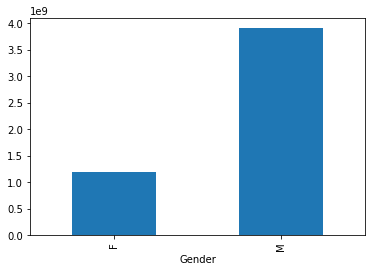

In [15]:
df.groupby('Gender')['Purchase'].sum().plot(kind='bar')

# M vs F count

<AxesSubplot:xlabel='Gender'>

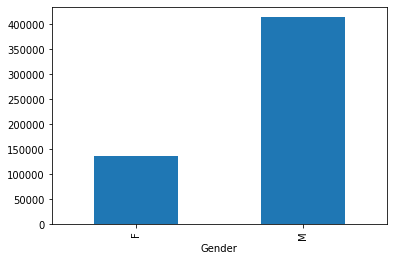

In [16]:
df.groupby('Gender')['User_ID'].agg('count').plot(kind='bar')

# How does marital status affect purchases

<AxesSubplot:xlabel='Marital_Status'>

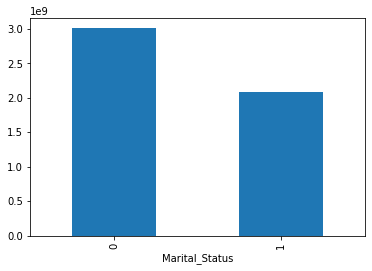

In [17]:
df.groupby('Marital_Status')['Purchase'].agg('sum').plot(kind='bar')

# Total number of buyers by city & Total number of purchases by city

,count
City_Category,
A,147720
B,231173
C,171175


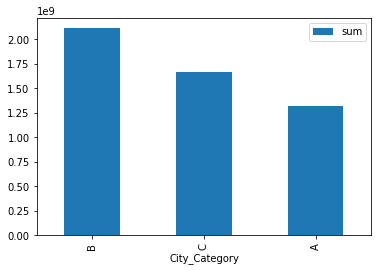

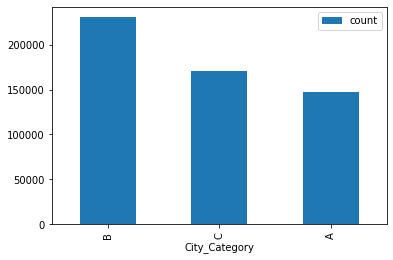

In [18]:
df.groupby('City_Category')['Purchase'].agg(['sum']).sort_values(by='sum',ascending=False).plot(kind='bar')
df.groupby('City_Category')['Purchase'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar')
df.groupby('City_Category')['User_ID'].agg(['count'])

# Occupation vs Purchased 

<AxesSubplot:ylabel='Occupation'>

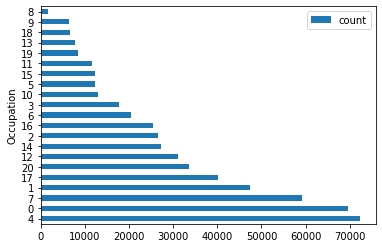

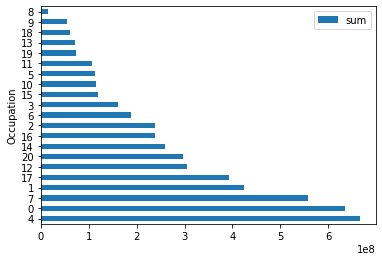

In [19]:
df.groupby('Occupation')['Purchase'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh')
df.groupby('Occupation')['Purchase'].agg(['sum']).sort_values(by='sum',ascending=False).plot(kind='barh')

# Age vs Purchased

In [20]:
def Age_group_1 (x):
  if x in ['0-17', '18-25']:
    return 'youth'
  if x in ['26-35', '36-45']:
    return 'middle age'
  if x in ['46-50', '51-55']:
    return 'older than average'
  return x

In [21]:
df['Age_group'] = df['Age'].apply(Age_group_1)

<AxesSubplot:xlabel='Age_group'>

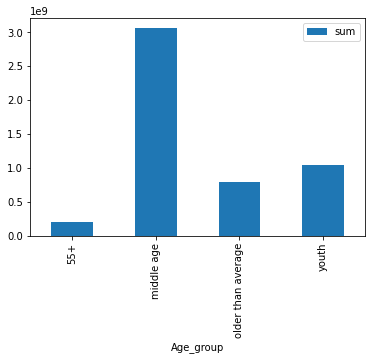

In [22]:
df.groupby('Age_group')['Purchase'].agg(['sum']).plot(kind='bar')

# The number of buyers of different genders relative to the time of their stay in the city

<AxesSubplot:ylabel='Stay_In_Current_City_Years'>

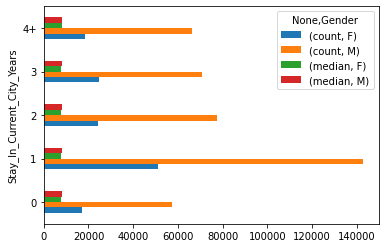

In [23]:
df.pivot_table(index='Stay_In_Current_City_Years', columns='Gender',values='Purchase', aggfunc=['count','median']).plot(kind='barh')

# Productcategory1/2/3 vs Purchased

<AxesSubplot:xlabel='Product_Category_3'>

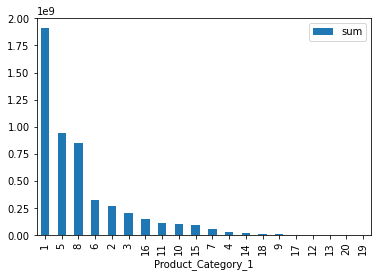

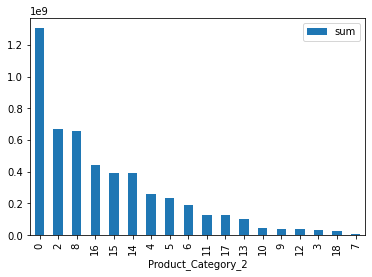

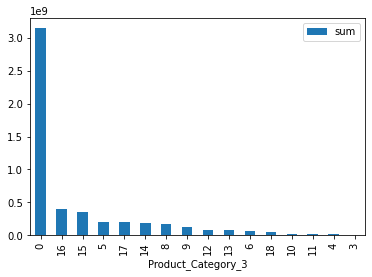

In [24]:
df.groupby('Product_Category_1')['Purchase'].agg(['sum']).sort_values(by='sum',ascending=False).plot(kind='bar')
df.groupby('Product_Category_2')['Purchase'].agg(['sum']).sort_values(by='sum',ascending=False).plot(kind='bar')
df.groupby('Product_Category_3')['Purchase'].agg(['sum']).sort_values(by='sum',ascending=False).plot(kind='bar')

# Top 10 users

In [25]:
df.groupby('User_ID', as_index=False).agg({'Purchase':'sum'}).sort_values(by='Purchase',ascending=False).head(10)

,User_ID,Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6566245
5683,1005831,6512433
981,1001015,6511314
3297,1003391,6477160
1142,1001181,6387961


# Top 10 products

In [26]:
df.groupby('Product_ID', as_index=False).agg({'Purchase':'count'}).sort_values(by='Purchase',ascending=False).head(10)

,Product_ID,Purchase
2536,P00265242,1880
249,P00025442,1615
1016,P00110742,1612
1030,P00112142,1562
565,P00057642,1470
1745,P00184942,1440
458,P00046742,1438
569,P00058042,1422
1355,P00145042,1406
582,P00059442,1406


# Number of unique users by city

In [27]:
df.groupby('City_Category', as_index=False).agg({'User_ID': 'nunique'}).sort_values('User_ID', ascending=False)

,City_Category,User_ID
2,C,3139
1,B,1707
0,A,1045


# Correlation

In [28]:
phik_overview= df.phik_matrix()

interval columns not set, guessing: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


/opt/conda/lib/python3.7/site-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable Product_ID is large: 3631. Are you sure this is not an interval variable? Analysis for pairs of variables including Product_ID can be slow.
  col, df[col].nunique()


In [29]:
phik_overview

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_group
User_ID,1.000000,0.160070,0.125115,0.147915,0.231895,0.142671,0.160214,0.085761,0.049844,0.034584,0.021770,0.034357,0.130336
Product_ID,0.160070,1.000000,0.247942,0.329884,0.181804,0.237000,0.000000,0.105964,1.000000,1.000000,1.000000,0.886075,0.334374
Gender,0.125115,0.247942,1.000000,0.047253,0.291588,0.004565,0.032712,0.018096,0.140485,0.135598,0.076621,0.092044,0.051221
Age,0.147915,0.329884,0.047253,1.000000,0.538363,0.208539,0.078217,0.321203,0.085078,0.068370,0.048062,0.043194,1.000000
Occupation,0.231895,0.181804,0.291588,0.538363,1.000000,0.161362,0.117038,0.193217,0.091033,0.077033,0.052882,0.069557,0.453787
City_Category,0.142671,0.237000,0.004565,0.208539,0.161362,1.000000,0.055838,0.023935,0.068298,0.049868,0.052522,0.086597,0.128972
Stay_In_Current_City_Years,0.160214,0.000000,0.032712,0.078217,0.117038,0.055838,1.000000,0.023912,0.025372,0.016639,0.014046,0.014276,0.060016
Marital_Status,0.085761,0.105964,0.018096,0.321203,0.193217,0.023935,0.023912,1.000000,0.035007,0.029103,0.022264,0.014590,0.497471
Product_Category_1,0.049844,1.000000,0.140485,0.085078,0.091033,0.068298,0.025372,0.035007,1.000000,0.789057,0.628496,0.834296,0.089649
Product_Category_2,0.034584,1.000000,0.135598,0.068370,0.077033,0.049868,0.016639,0.029103,0.789057,1.000000,0.744683,0.504486,0.073822


<AxesSubplot:>

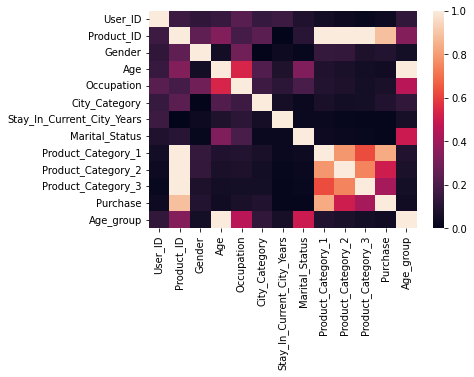

In [30]:
sns.heatmap(phik_overview)

In [31]:
phik_overview['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
Product_ID                    0.886075
Product_Category_1            0.834296
Product_Category_2            0.504486
Product_Category_3            0.413338
Gender                        0.092044
City_Category                 0.086597
Occupation                    0.069557
Age_group                     0.044158
Age                           0.043194
User_ID                       0.034357
Marital_Status                0.014590
Stay_In_Current_City_Years    0.014276
Name: Purchase, dtype: float64

***Based on the data above, we can understand that the "Product_id" and "Product_Category" have the greatest impact on the purchase amount, and the smallest is 'Stay_In_Current_City_Years', 'Marital_Status', 'Age'. Thank you for reading, I recently started doing data analytics and I will only be glad for advice and comments, thank you all*** 